Q1 Ans [n*m*(2k+1)]
     [n*m no. of cells]
 [k + (k-1)  where k is the no. of multiplications and k-1 is the no. of additions in cell]

In [7]:
import time

In [8]:
matrix1 = [[17,5,9],
        [9,11,13],
        [7 ,8,9]]
n=3
k=3
matrix2 = [[5,8,1],
        [3,5,6],
        [43,4,9]]
k=3
m=3

Q2

In [9]:
res = [[0 for x in range (len(matrix1)) ] for y in range (len(matrix2[0]))]
for i in range(len(matrix1)):
    for j in range(len(matrix2[0])):
         for m in range(k):
            res[i][j] += matrix1[i][m] * matrix2[m][j]
print(res)

[[487, 197, 128], [637, 179, 192], [446, 132, 136]]


In [10]:
import numpy as np
matrix1 = [[17,5,9],
        [9,11,13],
        [7 ,8,9]]
n=3
k=3
matrix2 = [[5,8,1],
        [3,5,6],
        [43,4,9]]
k=3
m=3

print (np.dot(matrix1,matrix2))

[[487 197 128]
 [637 179 192]
 [446 132 136]]


In [11]:
%%timeit

res = [[0 for x in range (len(matrix1)) ] for y in range (len(matrix2[0]))]
for i in range(len(matrix1)):
    for j in range(len(matrix2[0])):
         for m in range(k):
            res[i][j] += matrix1[i][m] * matrix2[m][j]



4.29 μs ± 244 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [12]:
import numpy as np
matrix1 = [[17,5,9],
        [9,11,13],
        [7 ,8,9]]
n=3
k=3
matrix2 = [[5,8,1],
        [3,5,6],
        [43,4,9]]
k=3
m=3

%timeit np.dot(matrix1,matrix2)

4.68 μs ± 197 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


it is faster with numpy as observed, because it provides a way to work in array without addressing each element and saves memory

Ans 3

In [27]:
def median_rep_pass(arr):
    n = len(arr)
    k = n // 2
    
    def find_kth(arr, k):
        for i in range(k):
            max_val = float('-inf') 
            for num in arr:
                if num > max_val:
                    max_val = num
            arr.remove(max_val)  
        return max_val
    
    if n % 2 == 0:
        median1 = find_kth(arr.copy(), k)
        median2 = find_kth(arr.copy(), k - 1)
        return (median1 + median2) / 2.0
    else:
        return find_kth(arr.copy(), k + 1)

import numpy as np
arr = np.random.randint(1, 100, 1000).tolist()
print(median_rep_pass(arr))


49.0


Here time complexity is n^2

In [29]:
def partition(arr,low,high):
    pivot=arr[high]
    i = low
    for j in range(low,high):
        if arr[j] <= pivot:
            arr[j],arr[i] = arr[i],arr[j]
            i+=1
    arr[high],arr[i] = arr[i],arr[high]
    return i
def quickselect(arr, low, high, k):
    if low == high:
        return arr[low]
    
    pivot_index = partition(arr, low, high)
    if k == pivot_index:
        return arr[k]
    elif k < pivot_index:
        return quickselect(arr, low, pivot_index - 1, k)
    else:
        return quickselect(arr, pivot_index + 1, high, k)

def find_median_quickselect(arr):
    n = len(arr)
    if n % 2 == 1:
        return quickselect(arr, 0, n - 1, n // 2)
    else:
        return (quickselect(arr, 0, n - 1, n // 2 - 1) + quickselect(arr, 0, n - 1, n // 2)) / 2
arr = [1,3,7,6,5,9,3]
print(find_median_quickselect(arr))

5


In [ ]:
Average Complexity in O(n)

In [35]:
import time

arr = np.random.randint(1, 100, 1000).tolist()


start = time.time()
median_repeated_passes = median_rep_pass(arr.copy())
end = time.time()
print(f"Repeated Passes Method Median: {median_repeated_passes}, Time: {end - start} seconds")

start = time.time()
median_quickselect = find_median_quickselect(arr.copy())
end = time.time()
print(f"Quickselect Method Median: {median_quickselect}, Time: {end - start} seconds")


start = time.time()
median_numpy = np.median(arr)
end = time.time()
print(f"NumPy Median: {median_numpy}, Time: {end - start:9f} seconds")


Repeated Passes Method Median: 51.0, Time: 0.01937270164489746 seconds
Quickselect Method Median: 51.0, Time: 0.006999969482421875 seconds
NumPy Median: 51.0, Time:  0.001007 seconds


In [ ]:
Clearly quick selct is fater

In [ ]:
Ans -4

In [ ]:
( 
∂x
∂f, 
∂y
∂f
​)=(2*x*y+(y^3)*cos(x),x^2+3*(y^2)*sin(x))

Ans-5

In [ ]:
pip install jax jaxlib

In [37]:
import jax.numpy as jnp

from jax import grad
import numpy as np

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# doubt !!!! can not use np.sin(x), do not know why??
grad_f = grad(f, (0, 1))  
print(grad_f )

def calc_x(x, y):
    return 2 * x * y + y**3 * np.cos(x)

def calc_y(x, y):
    return x**2 + 3 * y**2 * np.sin(x)
    
test_values = np.random.rand(3, 2)  

results = []
for x, y in test_values:
    jax_grad_x, jax_grad_y = grad_f(x,y)
    

    calc_x_val = calc_x(x, y)
    calc_y_val = calc_y(x, y)
    
    results.append({
        'x': x,
        'y': y,
        'jax_grad_x': jax_grad_x,
        'jax_grad_y': jax_grad_y,
        'analytical_grad_x': calc_x_val,
        'analytical_grad_y': calc_y_val,
    })

results


<function f at 0x000001AA514CF6A0>


[{'x': 0.6295302568304207,
  'y': 0.10917798928949463,
  'jax_grad_x': Array(0.13851361, dtype=float32),
  'jax_grad_y': Array(0.41736227, dtype=float32),
  'analytical_grad_x': 0.13851360892906855,
  'analytical_grad_y': 0.41736229086485366},
 {'x': 0.9268785498671216,
  'y': 0.9568961087367608,
  'jax_grad_x': Array(2.2998543, dtype=float32),
  'jax_grad_y': Array(3.0559776, dtype=float32),
  'analytical_grad_x': 2.299854218071915,
  'analytical_grad_y': 3.055977306417778},
 {'x': 0.4008134757856131,
  'y': 0.0049300315621247925,
  'jax_grad_x': Array(0.00395216, dtype=float32),
  'jax_grad_y': Array(0.1606799, dtype=float32),
  'analytical_grad_x': 0.003952156500856702,
  'analytical_grad_y': 0.1606798916799394}]

In [ ]:
Ans-6

In [ ]:
import sympy as sp
x, y= symbols('x y')
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)
grad_f = grad(f, (0, 1))
f_sym = x**2 * y + y**3 * sp.sin(x)
grad_f_sym = [sp.diff(f_sym, var) for var in (x, y)]
grad_f_x_sym = sp.lambdify((x, y), grad_f_sym[0], 'numpy')
grad_f_y_sym = sp.lambdify((x, y), grad_f_sym[1], 'numpy')
test_values = np.random.rand(5, 2)  

results = []
for x_val, y_val in test_values:
    jax_grad_x, jax_grad_y = grad_f(x_val,y_val)
    sym_grad_x = grad_f_x_sym(x_val, y_val)
    sym_grad_y = grad_f_y_sym(x_val, y_val)
    
    results.append({
        'x': x_val,
        'y': y_val,
        'sym_grad_x': sym_grad_x,
        'sym_grad_y': sym_grad_y,
        'jax_grad_x': jax_grad_x,
        'jax_grad_y': jax_grad_y,
        'grad_x_match': np.isclose(jax_grad_x, sym_grad_x),
        'grad_y_match': np.isclose(jax_grad_y, sym_grad_y)
    })
results


In [ ]:
Ans-7

In [ ]:
student_records = {
    2022: {
        "Branch 1": {
            1: {"Name": "Alice", "Marks": {"Maths": 95, "English": 88, "Science": 92}},
            2: {"Name": "Bob", "Marks": {"Maths": 78, "English": 85, "Science": 80}},
        },
        "Branch 2": {
            1: {"Name": "Charlie", "Marks": {"Maths": 88, "English": 90, "Science": 85}},
            2: {"Name": "Diana", "Marks": {"Maths": 80, "English": 75, "Science": 89}},
        }
    },
    2023: {
        "Branch 1": {
            1: {"Name": "Eve", "Marks": {"Maths": 89, "English": 85, "Science": 94}},
            2: {"Name": "Frank", "Marks": {"Maths": 76, "English": 82, "Science": 80}},
        },
        "Branch 2": {
            1: {"Name": "Grace", "Marks": {"Maths": 92, "English": 88, "Science": 91}},
            2: {"Name": "Hank", "Marks": {"Maths": 84, "English": 78, "Science": 83}},
        }
    },
    2024: {
        "Branch 1": {
            1: {"Name": "Ivy", "Marks": {"Maths": 90, "English": 87, "Science": 93}},
            2: {"Name": "Jack", "Marks": {"Maths": 85, "English": 80, "Science": 88}},
        },
        "Branch 2": {
            1: {"Name": "Karen", "Marks": {"Maths": 87, "English": 86, "Science": 90}},
            2: {"Name": "Leo", "Marks": {"Maths": 78, "English": 83, "Science": 85}},
        }
    },
    2025: {
        "Branch 1": {
            1: {"Name": "Mona", "Marks": {"Maths": 91, "English": 89, "Science": 94}},
            2: {"Name": "Nick", "Marks": {"Maths": 80, "English": 82, "Science": 79}},
        },
        "Branch 2": {
            1: {"Name": "Oscar", "Marks": {"Maths": 88, "English": 84, "Science": 86}},
            2: {"Name": "Pam", "Marks": {"Maths": 76, "English": 77, "Science": 78}},
        }
    }
}

student_records

In [ ]:
Ans-8

In [37]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks  

    def __repr__(self):
        return f"Student(Name: {self.name}, Roll Number: {self.roll_number}, Marks: {self.marks})"

class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch(Name: {self.branch_name}, Students: {self.students})"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year(Year: {self.year}, Branches: {self.branches})"

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        return f"Database(Years: {self.years})"

db = Database()

year_2022 = Year(2022)
branch_1_2022 = Branch("Branch 1")
branch_1_2022.add_student(Student("Alice", 1, {"Maths": 95, "English": 88, "Science": 92}))
branch_1_2022.add_student(Student("Bob", 2, {"Maths": 78, "English": 85, "Science": 80}))

branch_2_2022 = Branch("Branch 2")
branch_2_2022.add_student(Student("Charlie", 1, {"Maths": 88, "English": 90, "Science": 85}))
branch_2_2022.add_student(Student("Diana", 2, {"Maths": 80, "English": 75, "Science": 89}))

year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)


year_2023 = Year(2023)
branch_1_2023 = Branch("Branch 1")
branch_1_2023.add_student(Student("Eve", 1, {"Maths": 89, "English": 85, "Science": 94}))
branch_1_2023.add_student(Student("Frank", 2, {"Maths": 76, "English": 82, "Science": 80}))

branch_2_2023 = Branch("Branch 2")
branch_2_2023.add_student(Student("Grace", 1, {"Maths": 92, "English": 88, "Science": 91}))
branch_2_2023.add_student(Student("Hank", 2, {"Maths": 84, "English": 78, "Science": 83}))

year_2023.add_branch(branch_1_2023)
year_2023.add_branch(branch_2_2023)


year_2024 = Year(2024)
branch_1_2024 = Branch("Branch 1")
branch_1_2024.add_student(Student("Ivy", 1, {"Maths": 90, "English": 87, "Science": 93}))
branch_1_2024.add_student(Student("Jack", 2, {"Maths": 85, "English": 80, "Science": 88}))

branch_2_2024 = Branch("Branch 2")
branch_2_2024.add_student(Student("Karen", 1, {"Maths": 87, "English": 86, "Science": 90}))
branch_2_2024.add_student(Student("Leo", 2, {"Maths": 78, "English": 83, "Science": 85}))

year_2024.add_branch(branch_1_2024)
year_2024.add_branch(branch_2_2024)


year_2025 = Year(2025)
branch_1_2025 = Branch("Branch 1")
branch_1_2025.add_student(Student("Mona", 1, {"Maths": 91, "English": 89, "Science": 94}))
branch_1_2025.add_student(Student("Nick", 2, {"Maths": 80, "English": 82, "Science": 79}))

branch_2_2025 = Branch("Branch 2")
branch_2_2025.add_student(Student("Oscar", 1, {"Maths": 88, "English": 84, "Science": 86}))
branch_2_2025.add_student(Student("Pam", 2, {"Maths": 76, "English": 77, "Science": 78}))

year_2025.add_branch(branch_1_2025)
year_2025.add_branch(branch_2_2025)


db.add_year(year_2022)
db.add_year(year_2023)
db.add_year(year_2024)
db.add_year(year_2025)


print(db)


Database(Years: [Year(Year: 2022, Branches: [Branch(Name: Branch 1, Students: [Student(Name: Alice, Roll Number: 1, Marks: {'Maths': 95, 'English': 88, 'Science': 92}), Student(Name: Bob, Roll Number: 2, Marks: {'Maths': 78, 'English': 85, 'Science': 80})]), Branch(Name: Branch 2, Students: [Student(Name: Charlie, Roll Number: 1, Marks: {'Maths': 88, 'English': 90, 'Science': 85}), Student(Name: Diana, Roll Number: 2, Marks: {'Maths': 80, 'English': 75, 'Science': 89})])]), Year(Year: 2023, Branches: [Branch(Name: Branch 1, Students: [Student(Name: Eve, Roll Number: 1, Marks: {'Maths': 89, 'English': 85, 'Science': 94}), Student(Name: Frank, Roll Number: 2, Marks: {'Maths': 76, 'English': 82, 'Science': 80})]), Branch(Name: Branch 2, Students: [Student(Name: Grace, Roll Number: 1, Marks: {'Maths': 92, 'English': 88, 'Science': 91}), Student(Name: Hank, Roll Number: 2, Marks: {'Maths': 84, 'English': 78, 'Science': 83})])]), Year(Year: 2024, Branches: [Branch(Name: Branch 1, Students: [

In [ ]:
Ans-9

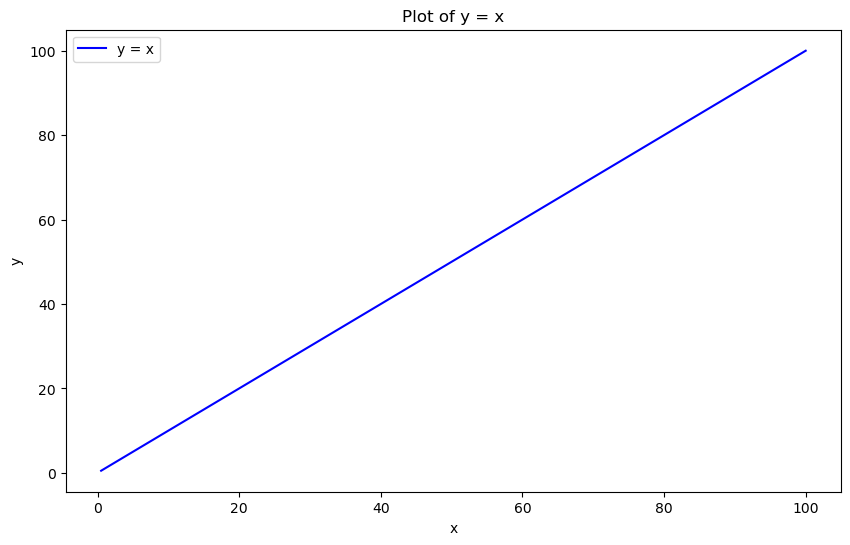

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)

y = x

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = x', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')
plt.legend()
plt.show()


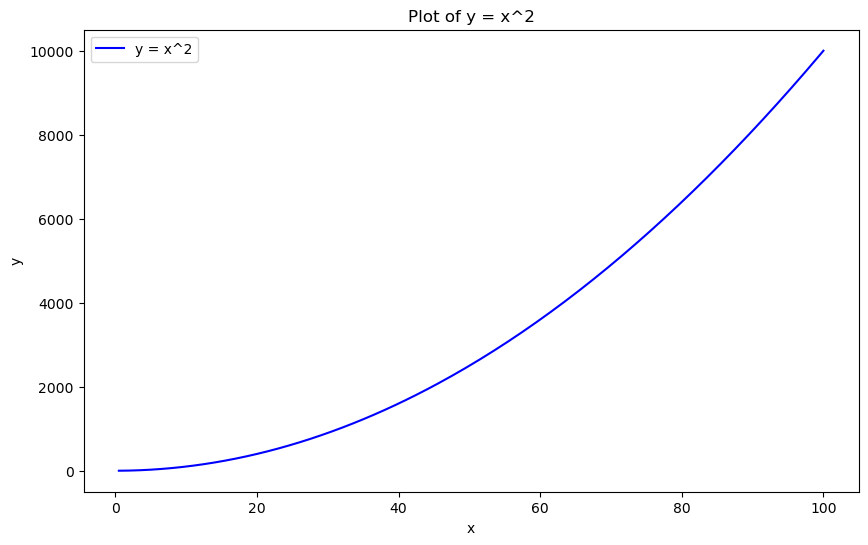

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)

y = x**2

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = x^2', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')
plt.legend()
plt.show()

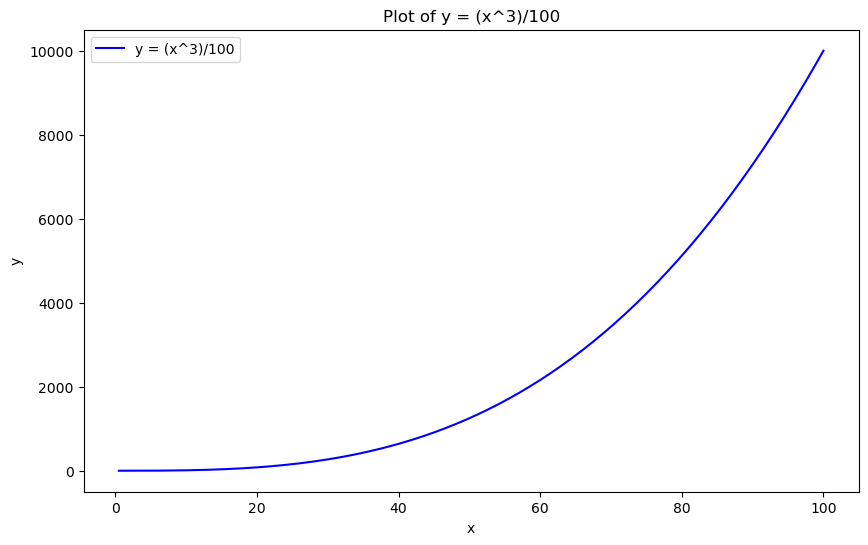

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)

y = (x**3)/100

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = (x^3)/100', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = (x^3)/100')
plt.legend()
plt.show()

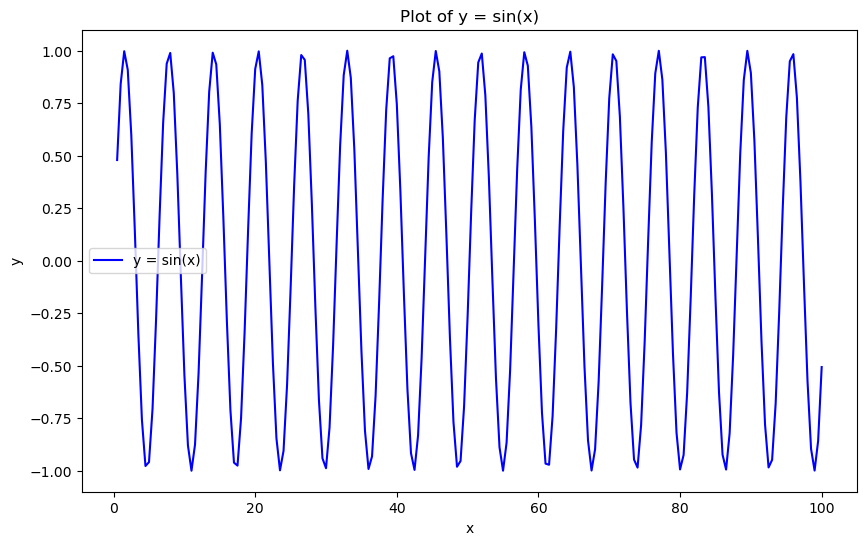

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)

y = np.sin(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = sin(x)', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')
plt.legend()
plt.show()

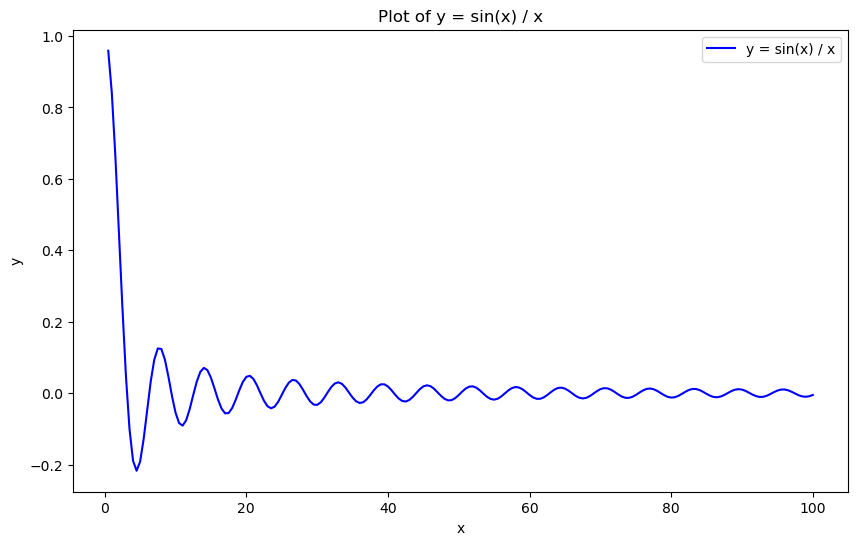

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)

y = (np.sin(x)) / x

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = sin(x) / x', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x) / x')
plt.legend()
plt.show()

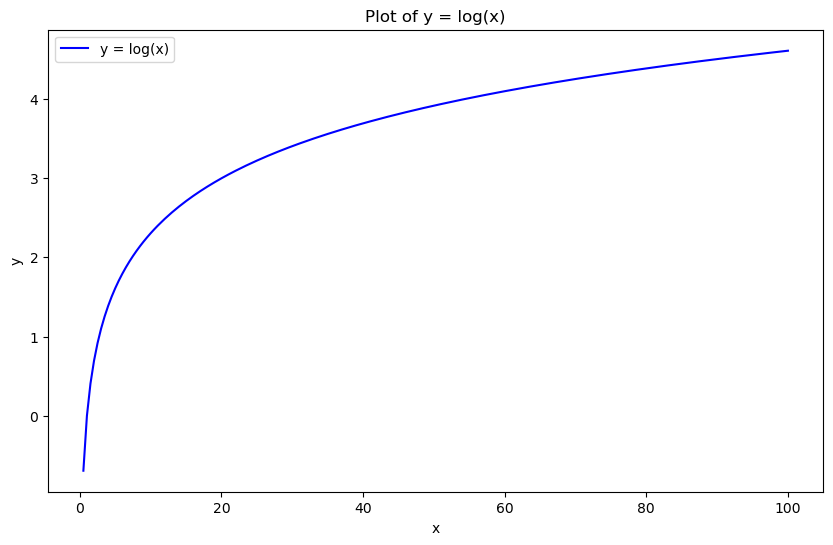

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)

y = np.log(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = log(x)', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = log(x)')
plt.legend()
plt.show()

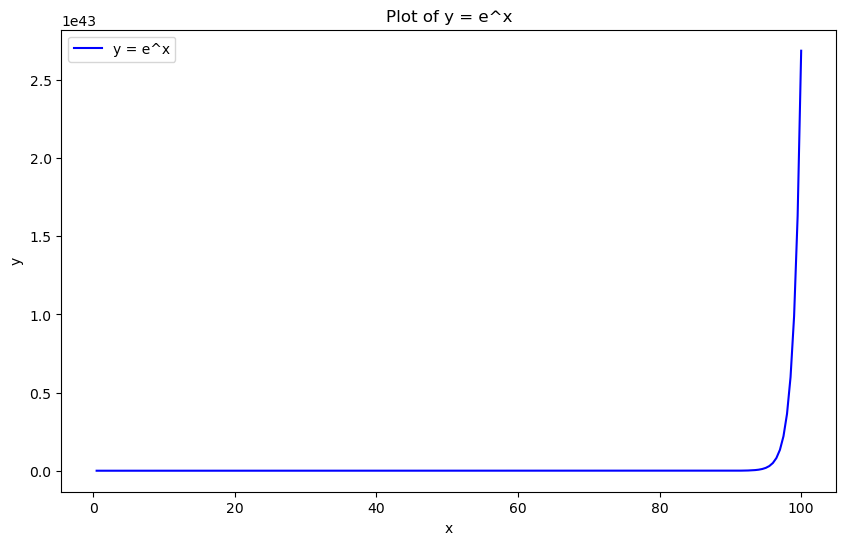

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)

y = np.exp(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = e^x', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = e^x')
plt.legend()
plt.show()

In [ ]:
Ans- 10 and 11

In [51]:
import numpy as np
import pandas as pd
k = np.random.rand(20,5) + 1
print(k)
r = pd.DataFrame(k)
print(r)
r.rename(columns = {0:'a',1:'b',2:'c',3:'d',4:'e'},inplace=True)
print(r.columns)
print(r)
print(r.std())
m = r.std().max()
print(m)
t = r.std().tolist()
n = t.index(m)
print(r.columns[n])
j=r.mean(axis=1).tolist()
j.index(min(j))
r['f']= r['a'] + r['b'] + r['c'] + r['d'] + r['e']
df=r
df['g']= ""
df.loc[df['f'] < 8,"g"]="LT8"
df.loc[df['f'] > 8,"g"]="GT8"
print(df)
df.groupby('g')['f'].std()

[[1.01205349 1.3811845  1.08631608 1.23828283 1.91169016]
 [1.98144395 1.44056751 1.69858589 1.635356   1.0975438 ]
 [1.1873886  1.64323278 1.86789201 1.82275838 1.50681533]
 [1.68816486 1.73860609 1.18295329 1.01824445 1.82521118]
 [1.00566053 1.88598178 1.04750623 1.70120222 1.55948355]
 [1.00859697 1.12602149 1.76955455 1.00764754 1.08070574]
 [1.89738363 1.01820495 1.48688998 1.72737673 1.20326239]
 [1.01154335 1.3595573  1.76119112 1.20709756 1.97647722]
 [1.87295266 1.67935831 1.31342981 1.88505114 1.51066319]
 [1.31676449 1.39815672 1.81128996 1.89360202 1.94731428]
 [1.46468271 1.51676589 1.92454606 1.72863528 1.80881483]
 [1.73770142 1.60656742 1.4592464  1.90546719 1.78665416]
 [1.92997508 1.7828897  1.91526102 1.23146745 1.6224787 ]
 [1.02906531 1.84901708 1.37347893 1.62690472 1.88918978]
 [1.70564397 1.67691875 1.36296511 1.92968034 1.53287835]
 [1.19662719 1.47300486 1.51971655 1.39772516 1.13584801]
 [1.7675152  1.33788241 1.44387356 1.72663098 1.43242581]
 [1.9517481  1

g
GT8    0.170997
LT8    0.521602
Name: f, dtype: float64

Ans-12

In [3]:
import numpy as np
a = np.array([1,7,9,17,6])
b= np.array([7,4,5,6,9])
print(a+b)
print(a*b)

[ 8 11 14 23 15]
[  7  28  45 102  54]


Ans-13

In [31]:
import numpy as np
t= np.random.rand(3,4)
print(np.argmin(t))
a = t.ndim
z=t.shape
mu =1
for i in z:
    mu*=i
def iter(a,d,res,t):
    if d>=a and len(res)!= mu:
        return res
    elif d>=a and len(res)== mu:
        print(res)
        return res
    else:
        for i in t:
            if d==a-1:
                res.append(i)
            iter(a,d+1,res,i)
    return res
qw = iter(a,0,[],t)
nt = list(qw)
qw.index(min(nt))

1
[0.5693123868406754, 0.007293040473938972, 0.9342210934966731, 0.5880051143098781, 0.06420974417587588, 0.7101885752401196, 0.10443246371060588, 0.6889963124835623, 0.7670960984569222, 0.9680317992254459, 0.8525213972547032, 0.7138779281140449]


1